In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.transform import (hough_line, hough_line_peaks)

d:\AnacondaPy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


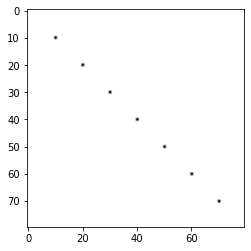

In [2]:
image = np.zeros((80,80)) # Create 80x80 pixel filled with zero
for i in range(10,71,10): # Assigning 1 to (10,10),(20,20)...(70,70) pixels
    image[i][i] = 1
plt.imshow(image,cmap="binary")

In [3]:
def hough_transform(image):

  rhos = np.linspace(-np.pi/2, np.pi/2, 180)

  hough_space, theta, dist = hough_line(image, rhos)

  h, q, d = hough_line_peaks(hough_space, theta, dist)

  angle_list=[]  #Create an empty list to capture all angles

  # Generating figure 1
  fig, axes = plt.subplots(1, 3, figsize=(15, 6))
  ax = axes.ravel()
  
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('Input image')
  ax[0].set_axis_off()
  
  ax[1].imshow(np.log(1 + hough_space),
               extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
               cmap='gray', aspect=1/1.5)
  ax[1].set_title('Hough transform')
  ax[1].set_xlabel('Angles (degrees)')
  ax[1].set_ylabel('Distance (pixels)')
  ax[1].axis('image')
  
  ax[2].imshow(image, cmap='gray')
  
  origin = np.array((0, image.shape[1]))
  
  for _, angle, dist in zip(*hough_line_peaks(hough_space, theta, dist)):
      angle_list.append(angle) #Not for plotting but later calculation of angles
      y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
      ax[2].plot(origin, (y0, y1), '-r')
  ax[2].set_xlim(origin)
  ax[2].set_ylim((image.shape[0], 0))
  ax[2].set_axis_off()
  ax[2].set_title('Detected lines')
  
  plt.tight_layout()
  plt.show()
  
  # Convert angles from radians to degrees (1 rad = 180/pi degrees)
  angles = [a*180/np.pi for a in angle_list]
  
  # Compute difference between the two lines
  angle_difference = np.max(angles) - np.min(angles)
  print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines

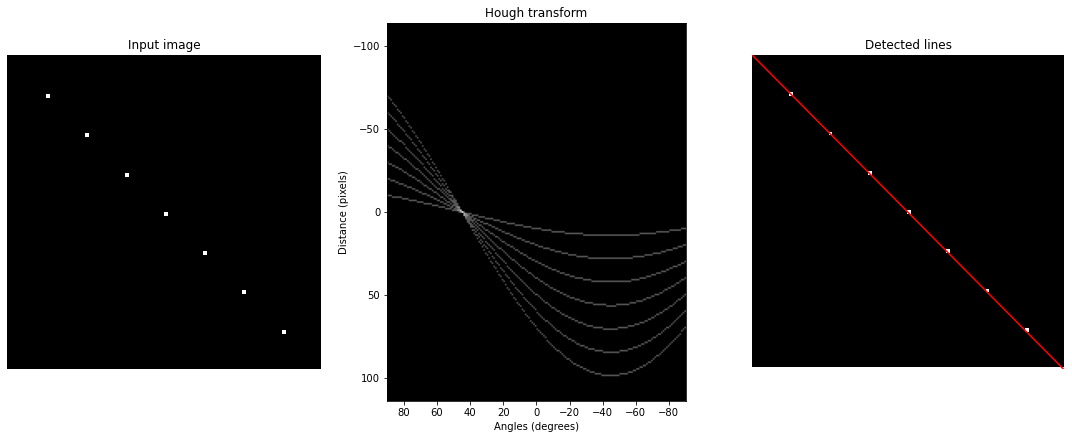

180.0


In [4]:
hough_transform(image)

In [5]:
def pgm_viewer(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    #y = bytearray(pixel_data_list) # Converting back to bytearray
    plt.figure()
    plt.imshow(imag, cmap="gray",vmax=255,vmin=0)
    plt.colorbar()

    return imag

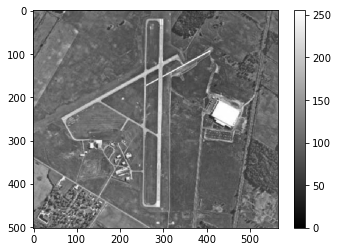

In [6]:
fig1034a = pgm_viewer('Fig1034(a)(marion_airport).pgm')

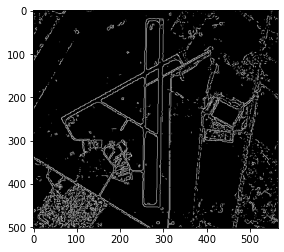

In [7]:
edges = cv.Canny(np.uint8(fig1034a),200,200)
plt.imshow(edges,cmap='gray')

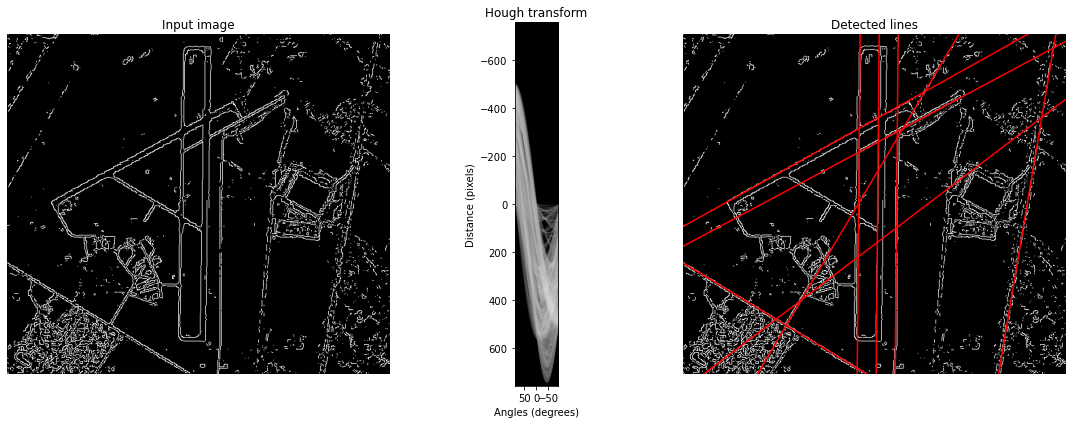

59.329608938547494


In [8]:
# Thresholding (convert to binary image)
for i in range(0,edges.shape[0]):
    for j in range(0,edges.shape[1]):
        if (edges[i][j] >=127 and edges[i][j] <=255):
            edges[i][j] = 1
        else:
            edges[i][j] = 0

hough_transform(edges)


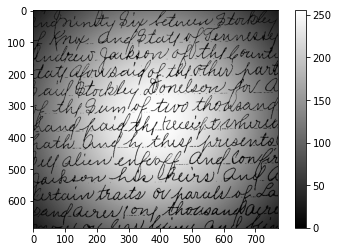

In [9]:
fig1049a= pgm_viewer('Fig1049(a)(spot_shaded_text_image).pgm')
fig1049a = fig1049a.astype('uint8')

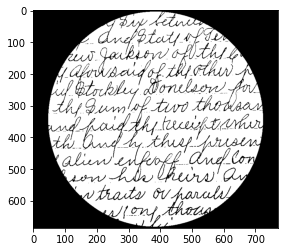

In [13]:
# Otsu Thresholding
ret, thresh1 = cv.threshold(fig1049a, 120, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh1,cmap='gray')

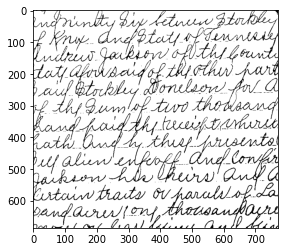

In [15]:
# Local Thresholding using moving average
thresh2 = cv.adaptiveThreshold(fig1049a, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
plt.imshow(thresh2,cmap='gray')

Sources:

https://alyssaq.github.io/2014/understanding-hough-transform/

https://github.com/bnsreenu/python_for_microscopists/blob/master/199_hough_transform.py
